In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('C:\\Users\\pc\\Desktop\\jupyter_notebook\\salary_predict.csv')

In [3]:
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [4]:
data.rename(columns = {'yrs.since.phd':'phd', 'yrs.service':'service'}, inplace = True)

In [5]:
data.describe()

,phd,service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [6]:
data.corr()

,phd,service,salary
phd,1.000000,0.909649,0.419231
service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [9]:
data['sex'] = le.fit_transform(data['sex'])

In [10]:
le.inverse_transform([0,1])

array(['Female', 'Male'], dtype=object)

In [11]:
ld = LabelEncoder()

In [12]:
data['rank'] = ld.fit_transform(data['rank'])

In [13]:
ld.inverse_transform([0,1,2])

array(['AssocProf', 'AsstProf', 'Prof'], dtype=object)

In [14]:
lc = LabelEncoder()

In [15]:
data['discipline'] = lc.fit_transform(data['discipline'])

In [16]:
lc.inverse_transform([0,1])

array(['A', 'B'], dtype=object)

In [17]:
data['rank'].value_counts()

2    266
1     67
0     64
Name: rank, dtype: int64

In [18]:
data['sex'].value_counts()

1    358
0     39
Name: sex, dtype: int64

In [19]:
data.describe()

,rank,discipline,phd,service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [20]:
data.isna().sum()

rank          0
discipline    0
phd           0
service       0
sex           0
salary        0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   rank        397 non-null    int32
 1   discipline  397 non-null    int32
 2   phd         397 non-null    int64
 3   service     397 non-null    int64
 4   sex         397 non-null    int32
 5   salary      397 non-null    int64
dtypes: int32(3), int64(3)
memory usage: 14.0 KB


# remove outliers

In [22]:
df_features = data.drop(['salary'],axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

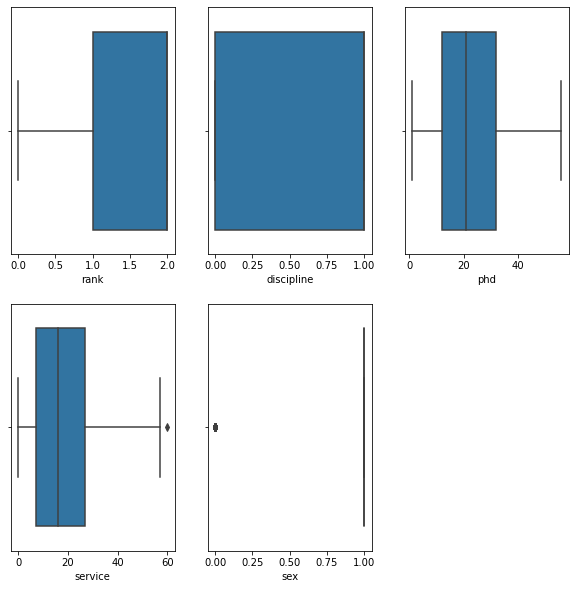

In [23]:
plt.figure(figsize=(10,10))
graph = 1
for column in df_features:
    if graph<=6:
        ax = plt.subplot(2,3,graph)
        sns.boxplot(df_features[column],orient='v')
        plt.xlabel(column,fontsize=10)
        
        
        
        graph+=1
plt.show()

In [24]:
q1 = data.quantile(0.25)
#2nd quantile
q3 = data.quantile(0.75)
#iqr
iqr = q3-q1


In [25]:
iqr

rank              1.0
discipline        1.0
phd              20.0
service          20.0
sex               0.0
salary        43185.0
dtype: float64

In [26]:
phd_high = (q3.salary + 1.5*iqr.salary)

In [27]:
phd_high

198962.5

In [28]:
index = np.where(data['salary']>phd_high)

In [29]:
index

(array([ 43, 249, 364], dtype=int32),)

In [30]:
data = data.drop(data.index[index])
data.shape

(394, 6)

In [31]:
hd_high = (q3.phd + 1.5*iqr.phd)

In [32]:
hd_high

62.0

In [33]:
index = np.where(data['phd']>hd_high)

In [34]:
index

(array([], dtype=int32),)

In [35]:
data = data.drop(data.index[index])
data.shape

(394, 6)

In [36]:
service_high = (q3.service + 1.5*iqr.service)

In [37]:
service_high

57.0

In [38]:
index = np.where(data['service']>service_high)

In [39]:
index

(array([328], dtype=int32),)

In [40]:
data.describe()

,rank,discipline,phd,service,sex,salary
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,1.505076,0.545685,22.205584,17.525381,0.901015,112945.225888
std,0.759151,0.498542,12.864764,12.940483,0.299021,29091.740021
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107175.000000
75%,2.000000,1.000000,31.750000,26.000000,1.000000,133850.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,194800.000000


In [41]:
x = data.drop(['salary'],axis=1)
y = data['salary']

In [42]:
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [43]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [45]:
X = data.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,rank,6.465500
1,discipline,2.024798
2,phd,25.030272
3,service,16.439784
4,sex,5.460579


In [46]:
data.corr()

,rank,discipline,phd,service,sex,salary
rank,1.000000,-0.084655,0.523712,0.447698,0.131126,0.529546
discipline,-0.084655,1.000000,-0.217095,-0.167216,0.004809,0.171834
phd,0.523712,-0.217095,1.000000,0.910941,0.146856,0.410775
service,0.447698,-0.167216,0.910941,1.000000,0.152883,0.327271
sex,0.131126,0.004809,0.146856,0.152883,1.000000,0.136241
salary,0.529546,0.171834,0.410775,0.327271,0.136241,1.000000


In [47]:
data.corr()['salary']

rank          0.529546
discipline    0.171834
phd           0.410775
service       0.327271
sex           0.136241
salary        1.000000
Name: salary, dtype: float64

In [48]:
data.drop(['sex'],axis=1,inplace=True)

In [49]:
#data = data.drop(['service','discipline',],axis=1)

In [50]:
data

,rank,discipline,phd,service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,1,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500
...,...,...,...,...,...
392,2,0,33,30,103106
393,2,0,31,19,150564
394,2,0,42,25,101738
395,2,0,25,15,95329


In [51]:
x = data.drop(['salary'],axis=1)
y = data['salary']

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=41)

In [55]:
lr = LinearRegression()

In [56]:
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
pred = lr.predict(x_test)

In [58]:
lr.score(x_train,y_train)

0.37793552120025786

In [59]:
lr.score(x_test,y_test)

0.37232565892062075

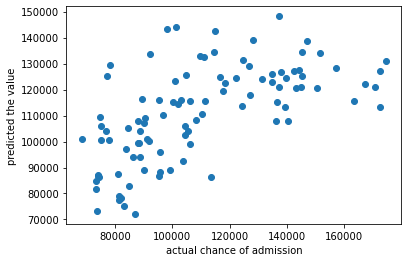

In [60]:
plt.scatter(y_test,pred)
plt.xlabel('actual chance of admission')
plt.ylabel('predicted the value')
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [62]:
pred = lr.predict(x_test)

In [63]:
mean_absolute_error(y_test,pred)

17354.95174751624

In [64]:
mean_squared_error(y_test,pred)

485723552.84118223

In [65]:
np.sqrt(mean_squared_error(y_test,pred))

22039.136844286397

In [66]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [67]:
lassocv = LassoCV(alphas = None,max_iter=100,normalize=True)

In [68]:
lassocv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [69]:
alpha = lassocv.alpha_

In [70]:
alpha

2.481214978557573

In [71]:
lasso_reg = Lasso(alpha)

In [72]:
lasso_reg.fit(x_train,y_train)

Lasso(alpha=2.481214978557573)

In [73]:
lasso_reg.score(x_test,y_test)

0.37235056061082283

In [74]:
ridgecv = RidgeCV(alphas = np.arange(0.0001,0.1,0.001),normalize=True)

In [75]:
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.0001, 0.0011, 0.0021, 0.0031, 0.0041, 0.0051, 0.0061, 0.0071,
       0.0081, 0.0091, 0.0101, 0.0111, 0.0121, 0.0131, 0.0141, 0.0151,
       0.0161, 0.0171, 0.0181, 0.0191, 0.0201, 0.0211, 0.0221, 0.0231,
       0.0241, 0.0251, 0.0261, 0.0271, 0.0281, 0.0291, 0.0301, 0.0311,
       0.0321, 0.0331, 0.0341, 0.0351, 0.0361, 0.0371, 0.0381, 0.0391,
       0.0401, 0.0411, 0.0421, 0.0431, 0.0441, 0.0451, 0.0461...
       0.0481, 0.0491, 0.0501, 0.0511, 0.0521, 0.0531, 0.0541, 0.0551,
       0.0561, 0.0571, 0.0581, 0.0591, 0.0601, 0.0611, 0.0621, 0.0631,
       0.0641, 0.0651, 0.0661, 0.0671, 0.0681, 0.0691, 0.0701, 0.0711,
       0.0721, 0.0731, 0.0741, 0.0751, 0.0761, 0.0771, 0.0781, 0.0791,
       0.0801, 0.0811, 0.0821, 0.0831, 0.0841, 0.0851, 0.0861, 0.0871,
       0.0881, 0.0891, 0.0901, 0.0911, 0.0921, 0.0931, 0.0941, 0.0951,
       0.0961, 0.0971, 0.0981, 0.0991]),
        normalize=True)

In [76]:
ridgecv.alpha_

0.0131

In [77]:
ridge_model = Ridge(alpha=ridgecv.alpha_)

In [78]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.0131)

In [79]:
ridge_model.score(x_test,y_test)

0.3723334136986689